# **Proyek Analisis Data: Bike Sharing Dataset**
- Nama: Eka Bayu Satriawan
- Email: ekabayus12@gmail.com
- Id Dicoding: https://www.dicoding.com/users/ekabayu_12

## **Menentukan Pertanyaan Bisnis**

- Apakah ada peran dari cuaca terhadap jumlah pengguna sepeda?
- Bagaimana kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday?

## **Menyiapkan semua library yang dibutuhkan**

Sebelum memulai proyek, pastikan kita telah mengimport semua library yang kita butuhkan untuk mengerjakan proyeknya.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## **Data Wrangling**

### **Gathering Data**

Pada tahap ini kita akan mengumpulkan data yang telah kita kumpulkan. Karena saya memilih **Bike Sharing Dataset**, maka saya mengimpor file **day.csv** dan **hr.csv**

### **Load tabel day**

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/EBay12Y/submission-proyek-analisis-data/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### **Load tabel hr**

In [3]:
hr_df = pd.read_csv("https://raw.githubusercontent.com/EBay12Y/submission-proyek-analisis-data/main/data/hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### **Menilai day_df**

1. Mengecek tipe data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dapat kita lihat diatas, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

2. Mengecek apakah ada missing values

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat kita simpulkan bahwa tabel day_df tidak ada missing values, berarti aman.

3. Mengecek apakah ada duplicate data

In [6]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


Pada tabel day_df terdapat 0 data yang double, artinya semua data bersifat unik.

4. Mengecek apakah terdapat keanehan pada nilai statistiknya

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dapat kita lihat diatas, tidak ada keanehan pada nilai statistiknya.

### **Menilai hr_df**

1. Mengecek info hr_df

In [8]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dapat kita lihat diatas, terdapat 1 tipe data berdasarkan kolomnya yang tidak sesuai. Data yang perlu diperbaiki adalah: dteday -> datetime

2. Mengecek apakah ada missing values

In [9]:
hr_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat kita simpulkan bahwa tabel hr_df tidak ada missing values, berarti aman.

3. Mengecek apakah ada duplicate data

In [10]:
print("Jumlah duplikasi data: ", hr_df.duplicated().sum())

Jumlah duplikasi data:  0


4. Mengecek apakah terdapat keanehan pada nilai statistiknya

In [11]:
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dapat kita lihat diatas, tidak ada keanehan pada nilai statistiknya.

### **Cleaning Data**

1. Menghapus tabel yang tidak diperlukan

Sebelum kita masuk ke tahapan-tahapan selanjutnya, kita sekarang akan menghapus terlebih dahulu tabel **hr**. Alasannya adalah karena kita tidak relevan dengan pertanyaan bisnis yang sudah kita tetapkan, dan juga sebenarnya tabel hr dan day itu bedanya hanya di kolom hrnya saja, selebihnya sama semua.

In [12]:
del hr_df

2. Menghapus beberapa kolom yang tidak akan digunakan

Berdasarkan pertanyaan bisnis yang sudah ada, maka untuk kolom yang akan didrop, yakni:
- instant: Karena indeks catatan ini tidak memberikan informasi tambahan yang berguna.
- windspeed: Tidak ada pertanyaan bisnis yang terkait dengan efek kecepatan angin terhadap jumlah penyewa sepeda.

In [13]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


3. Mengubah beberapa detail tentang kolom

Karena nama-nama dari kolom diatas agak kurang sesuai dengan style saya, maka akan saya rubah. Dan juga saya lebih suka dengan tipe data yang bentuknya kategorikal, jadi beberapa yang sebelumnya adalah angka akan saya rubah. Serta sebelumnya ada tipe data yang juga tidak sesuai, dan itu akan saya rubah juga.

In [14]:
# Mengubah nama judul kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [15]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [16]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


## **Exploratory Data Analysis (EDA)**

### **Eksplorasi Data day_df**

1. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan bulan

In [18]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Berdasarkan hasil diatas, dapat disimpulkan bahwa bulan yang memiliki rata-rata terbesar dan jumlah terbanyak adalah bulan Juni. Sedangkan rata-rata terkecil dan jumlah terkecil adalah bulan Januari.

2. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan keadaan cuaca

In [19]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda cenderung menyewa pada saat cuaca ketika sedang cerah atau mendung. Sangat sedikit ketika salju turun dan tidak ada ketika cuaca sedang sangat buruk.

3. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan holiday

In [20]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan hasil diatas, dapat disimpulkan bahwa para penyewa sepeda lebih suka menyewa sepeda saat bukan hari-hari libur, melainkan pada saat hari-hari biasa.

4. Bandingkan penyewa sepeda pada saat hari kerja (weekday) vs akhir pekan (weekend)

In [21]:
day_df.groupby(by='weekday').agg({
    'count':['max','min','mean']
})

count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

Berdasarkan hasil diatas, Urutan rata-rata jumlah penyewa dari terbesar ke yang terkecil yakni: Jumat (Fri), Kamis (Thu), Sabtu (Sat), Rabu (Wed), Selasa (Tue), Senin (Mon), dan Minggu (Sun).

5. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan workingday

In [22]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean']
})

count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Berdasarkan hasil diatas, jumlah penyewaan sepeda terbesar jatuh kepada workingday atau hari kerja dibandingkan dengan hari non-workingday. Namun dapat kita lihat juga, hasilnya lumayan berbeda walaupun tidak banyal.

6. Kelompokkan penyewa sepeda (baik casual dan registered) berdasarkan season

In [23]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Winter   729.112360  3999.050562  8555    22  4728.162921

Berdasarkan hasil analisis diatas, para penyewa sepeda baik Casual Dan Registered, suka sekali pada musim gugur (Fall), dapat dilihat dari rata-ratanya. Sedangkan yang paling sedikit adalah pada musim semi (Spring) dengan rata-rata yang paling kecil.

7. Kelompokkan temp, hum, dan humidity berdasarkan season

In [24]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'hum': ['max', 'min', 'mean']
})

temp                         atemp                           hum  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                            
             min      mean  
season                      
Fall    0.360000  0.633482  
Spring  0.000000  0.582903  
Summer  0.254167  0.626948  
Winter  0.333478  0.668719

Berdasarkan hasil analisis diatas, dapat disimpulkan beberapa pernyataan sebagai berikut:
- Rata-rata temperatur dan atemp tertinggi terjadi pada musim gugur (fall season) yang selanjutnya diikuti oleh summer, winter, dan spring.
- Rata-rata humidity tertinggi terjadi pada musim terjadi pada musim dingin (winter season) yang selanjutnya diikuti oleh fall, summer, dan spring.

8. Hubungan antara penyewa casual, registered, dan count

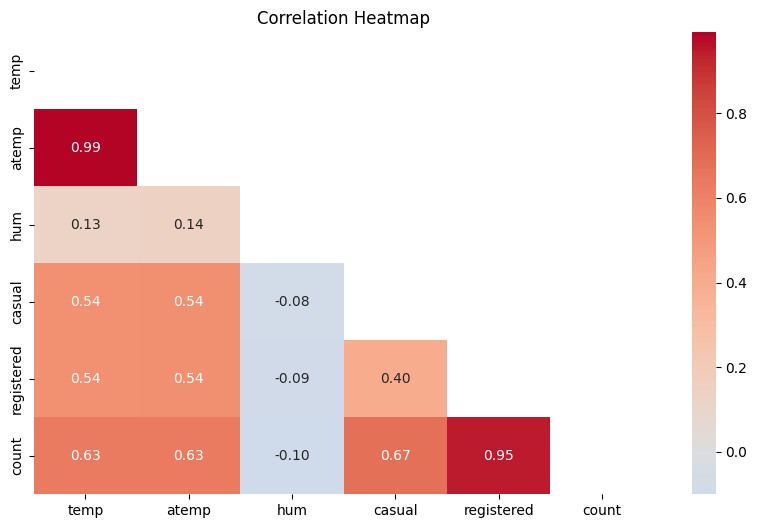

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berdasarkan hasil analisis diatas, didapat pernyataan sebagai berikut:
- atemp dan temp sangat berkorelasi (0.99).
- hum memiliki korelasi lemah dengan temp dan atemp (0.13 dan 0.14).
- casual cukup berkorelasi dengan temp dan atemp (0.54), dan sedikit negatif dengan hum (-0.08).
- registered memiliki pola yang sama seperti casual, dan berkorelasi moderat dengan casual (0.40).
- count berkorelasi kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95), dan sedikit negatif dengan hum (-0.10).

## **Visualization & Explanatory Analysis**

### **Pertanyaan 1: Apakah ada peran cuaca terhadap jumlah pengguna sepeda?**

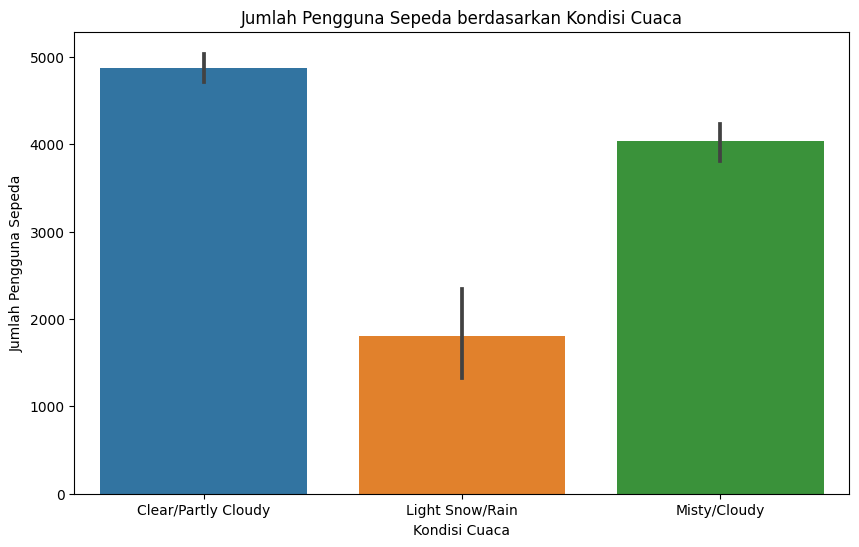

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan visualisasi data menggunakan boxplot, dapat disimpulkan bahwa jelas terdapat hubungan antara kondisi cuaca dan penyewa sepeda, Kondisi cuaca saat sedang cerah/setengah mendung menjadi kondisi yang paling diminati, kemudian diikuti dengan cuaca berkabut/mendung, dan terakhir ketika cuaca sedang sedikit bersalju/hujan menjadi yang paling sedikit diminati.

### **Pertanyaan 2: Bagaimana kondisi yang tampak ketika sepeda digunakan pada workingday, holiday, dan weekday?**

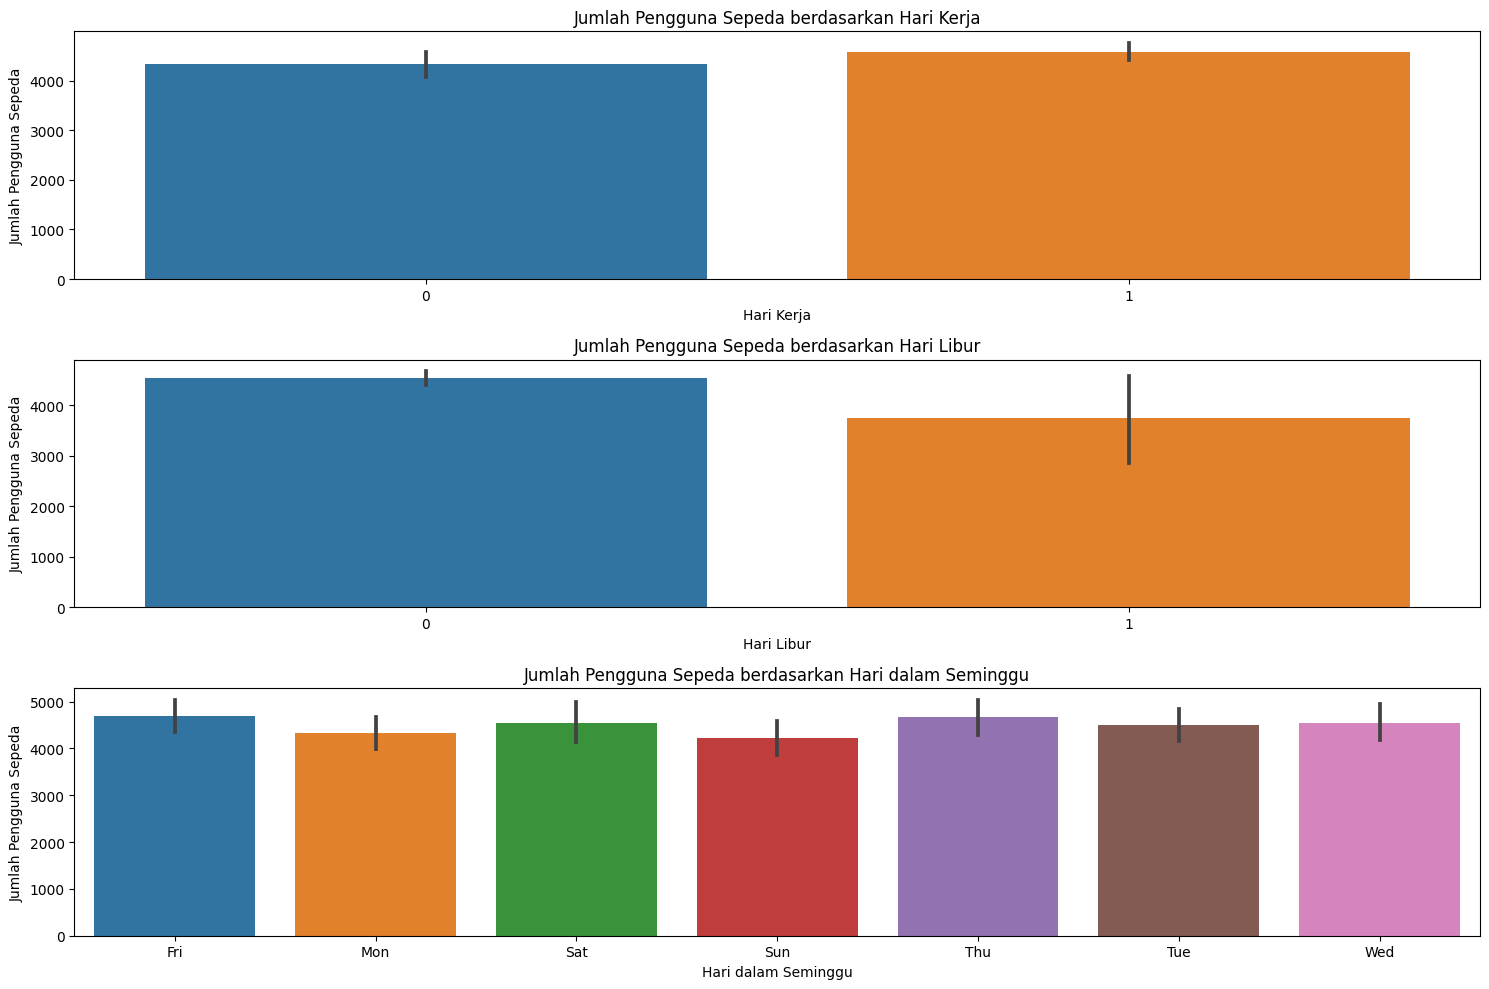

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Berdasarkan workingday
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan holiday
sns.barplot(
  x='holiday',
  y='count',
  data=day_df,
  ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan weekday
sns.barplot(
  x='weekday',
  y='count',
  data=day_df,
  ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi data diatas menggunakan barplot, didapat pernyataan sebagai berikut:
- Jumlah penyewa sepeda lebih banyak pada hari kerja (yakni senin - jumat) daripada akhir pekan (yakni sabtu dan minggu). 0 menandakan akhir pekan dan 1 menandakan hari kerja.
- Jumlah penyewa sepeda jauh lebih banyak pada hari biasa (bukan hari libur) dibandingkan hari libur (nasional).
- Jumlah penyewa sepeda pada hari Jumat ialah yang menempati posisi pertama sebagai hari dengan penyewa sepeda terbanyak, dan hari Minggu menempati posisi terakhir dengan jumlah penyewa sepeda yang paling sedikit.


## **Conclusion**

- Conclusion pertanyaan 1:
Dapat terlihat jelas terdapat hubungan diantara keduanya. Para penyewa sepeda sangat menyukai ketika cuaca sedang Cerah/Sedikit mendung dengan Q3 diatas 6000 dan Q1 kurang dari 4000 serta mediannya hampir 5000. Lalu posisi kedua ditempati ketika cuaca sedang Berkabut/Mendung dengan Q3 diatas 5000 dan Q1 dibawah 3000 serta mediannya diatas 4000. Terakhir pengguna kurang menyukai ketika suasana sedang Sedikit bersalju/Hujan dengan Q3 diatas 2000 dan Q1 dibawah 1000 serta mediannya diatas 1000. Dan untuk cuaca ketika Badai Besar tidak ada datanya, karena memang tidak memungkinan untuk bersepeda ketika kondisi cuaca semacam itu.

- conclusion pertanyaan 2:
Kondisi yang tampak pada visualisasi ini terbagi menjadi tiga bagian. Untuk jumlah pengguna sepeda berdasarkan workingday, workingday lah yang mengungguli non-workingday walaupun hasilnya memang tidak terlalu signifikan, tetapi tetap ada perbedaan yang jelas walaupun keduanya sama-sama diatas 4000 jumlah pengguna. Lanjut berdasarkan holiday (hari libur), disini non-holidaylah yang menang dengan perbedaan yang cukup signifikan daripada yang holiday. Hal ini mungkin pengguna lebih menyukai sewa sepeda saat hari-hari biasa saja. Terakhir berdasarkan weekday, berdasarkan data diatas, Hari Jumat (Fri) lah yang menempati urutan pertama dengan mean 4690.288462 dan di urutan terakhir ditempati oleh Minggu (Sun): 4228.828571.